In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.ensemble import RandomForestRegressor # Random Forest

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold # For creating folds

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [2]:
# Loading dataset
traffic_df = pd.read_csv('Traffic_Volume_adjusted.csv')
# traffic_df['holiday'].fillna('None', inplace=True)
traffic_df.head()
print("Number of lines present:-",  
      len(traffic_df)) 

Number of lines present:- 48204


In [3]:
# Dropping null values
traffic_df.dropna(inplace = True)
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
 7   month           48204 non-null  object 
 8   day             48204 non-null  object 
 9   hour            48204 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 3.7+ MB


In [4]:
output = traffic_df["traffic_volume"]
features_df = traffic_df.drop(columns='traffic_volume')
features = features_df[features_df.columns.tolist()] 

cat_var = ['holiday', 'weather_main', 'month', 'day']
features_encoded = pd.get_dummies(features_df, columns = cat_var)
features_encoded.head()

# Factorize output feature (convert from string to number)
# output, uniques = pd.factorize(output) 

,temp,rain_1h,snow_1h,clouds_all,hour,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,...,month_November,month_October,month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,288.28,0.0,0.0,40,9,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,289.36,0.0,0.0,75,10,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,289.58,0.0,0.0,90,11,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,290.13,0.0,0.0,90,12,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,291.14,0.0,0.0,75,13,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [5]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Define your model
classifier = RandomForestRegressor(random_state = 42)

In [7]:
# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 9, 16, 23, 30],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 112, 175, 237, 300]}


In [8]:
# Creating folds
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 10,
                              scoring = 'r2', 
                              cv = folds, 
                              verbose = 1,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [9]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training time: 407.32772755622864s


In [10]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.9454479013281777
Initial parameters:  {'n_estimators': 175, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30}


In [11]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [20, 30, 40],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [150, 175, 200]
}

pprint(param_grid)

{'max_depth': [20, 30, 40],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [150, 175, 200]}


In [12]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [13]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Training time: 3082.73140668869s


In [14]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.9456376124092162
Improved parameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 175}


In [15]:
# Predictions on test set
y_pred = model_cv.predict(test_X)

mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

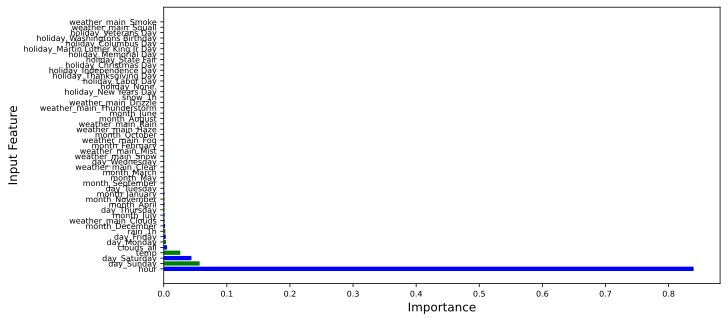

In [18]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
fig = plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'green'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

# plt.tight_layout();
fig.savefig("rf_feature_imp.svg", bbox_inches='tight')

In [19]:
rf_pickle = open('rf_traffic.pickle', 'wb') 
pickle.dump(model_cv, rf_pickle) 
rf_pickle.close() 

In [23]:
import csv

data = ["Random Forest", r2, rmse]

with open('results.csv', mode='a', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(data)